<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/CodingwithQiskit1_x_Episode3_HelloWorld_mkbahk_20241218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Qiskit Programming Process
1. Map the Problem to Circuits and Operators
2. Optimize the Circuit
3. Execute it on a Backend
4. Post-Process the Result

##Install Qiskit

In [1]:
%pip install qiskit[all]==1.3.1
%pip install qiskit_aer==0.15.1
%pip install qiskit-ibm-runtime==0.34.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.8/539.8 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f726779a6598f17f5ba9d19a3624c70

#Version checking

In [2]:
%pip show qiskit qiskit_aer qiskit-ibm-runtime

Name: qiskit
Version: 1.3.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 
---
Name: qiskit-ibm-runtime
Version: 0.34.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.

In [3]:
import qiskit
qiskit.__version__

'1.3.1'

In [4]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [5]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.__version__

'0.34.0'

##Set up an Quantum Runtime Service channel

In [74]:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService(channel="ibm_cloud",
#                               token="",
#                               instance="crn:v1:bluemix:public:quantum-computing:us-east:a/71306d10032b425fb301ccb4c4df2a2c:54d1d0a2-bd74-45c7-9025-b302264b49cd::")
#service

<QiskitRuntimeService>

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="",
                               instance="ibm-q/open/main")
service

<QiskitRuntimeService>

In [33]:
#from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
#QiskitRuntimeService.save_account(
#    channel="ibm_cloud",
#    token="y",
#    instance="",
#    # Explicitly set instance to None for ibm_cloud channel
#    set_as_default=True,
#    # Use `overwrite=True` if you're updating your token.
#    overwrite=True,
#)

# Load saved credentials
#service = QiskitRuntimeService()

In [7]:
#backends= service.backends()
backends= service.backends(operational=True, simulator=False, min_num_qubits=5)
backends

[<IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_brisbane')>]

In [8]:
#backend = service.backends()[0]
#backend = service.least_busy(operational=True, simulator=False)
backend = service.backend(name="ibm_brisbane")
#backend = service.backend("ibmq_qasm_simulator")
#backend = service.backend("simulator_statevector")
#backend = service.backend("simulator_mps")
#backend = service.backend("simulator_stabilizer")

In [9]:
backend.backend_version

'1.1.61'

In [10]:
backend.num_qubits

127

# Do the Hello World example on a 2-qubit Bell state


#Step 1: Map the problem to circuits and operators


In [11]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

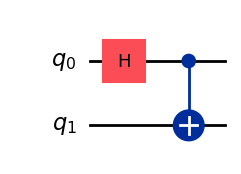

In [12]:
qc.draw(output='mpl')

In [13]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

#Step 2: Optimize


#Step 3: Execute on the qiskit aer backend

##qiskit.primitives은 없어질 예정

In [17]:
#primitives는 qiskit(Deprecation예정)에도 있고, qiskit_runtime에도 있고, qiskit_aer simulator에도 있음
from qiskit.primitives import Estimator as QiskitEstimator
estimator1 = QiskitEstimator()
job1 = estimator1.run([qc] * len(observables), observables)

<ipython-input-17-af255f155b58>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator1 = QiskitEstimator()


In [18]:
job1.result()

EstimatorResult(values=array([1., 0., 0., 1., 0., 0.]), metadata=[{}, {}, {}, {}, {}, {}])

##Aer 시뮬레이터를 이용한 수행

In [19]:
from qiskit_aer.primitives import Estimator as AerEstimator
estimator2 = AerEstimator()
job2 = estimator2.run([qc] * len(observables), observables)

In [20]:
job2.result()

EstimatorResult(values=array([1.        , 0.02929688, 0.02929688, 1.        , 0.04296875,
       0.04296875]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.001855798, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000574636, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9991416931152344, 'simulator_metadata': [{'time_taken': 0.001855798, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00057463

#Real QPU와 qiskit_ibm_runtime 을 이용한 수행

In [21]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm1 = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm1.run(qc)

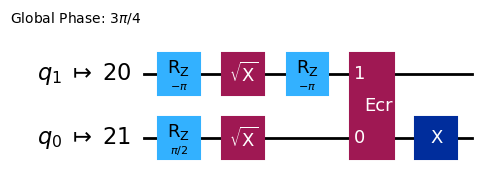

In [22]:
isa_circuit.draw('mpl', idle_wires=False)

In [23]:
from qiskit_ibm_runtime import Session, SamplerV2 as qirV2Sampler, EstimatorV2 as qirV2Estrimator
estimator3 = qirV2Estrimator(mode=backend)
estimator3.options.resilience_level = 1
estimator3.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job3 = estimator3.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job3.job_id()}")

>>> Job ID: cxhmdkpgcckg008skhd0


In [40]:
print(job3.status())

NameError: name 'job3' is not defined

In [8]:
### 서비스 플렛폼에서 Job이 완료되면 그 Job.ID를 이용해 결과를 추출합니다. ###
job3 = service.job("cxhmdkpgcckg008skhd0")

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job3_result = job3.result()

In [9]:
for idx, pub_result in enumerate(job3_result):
  print(f"Expectation values for pub {idx}: {pub_result.data.evs}")
###for

Expectation values for pub 0: [1.00722429 0.00575392 0.00687494 1.06193549 0.02567135 0.01779395]


In [11]:
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job3.result()[0]
pub_result

PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'shots': 5024, 'target_precision': 0.01414213562373095, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})

##Fake Provider를 이용한 수행

In [27]:
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2, FakeBrisbane
backend4 = FakeBrisbane()

In [28]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend4, optimization_level=1)
isa_circuit4 = pm.run(qc)

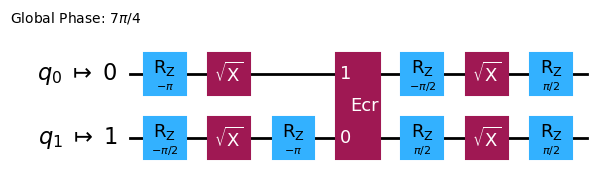

In [29]:
isa_circuit4.draw('mpl', idle_wires=False)

In [33]:
from qiskit_ibm_runtime.estimator import EstimatorV2 as Estimator4
estimator4 = Estimator4(mode=backend4) #EstimatorV2만 동작함
#estimator4.options.resilience_level = 1
#estimator4.options.default_shots = 5000

mapped_observables2 = [
    observable.apply_layout(isa_circuit4.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job5 = estimator4.run([(isa_circuit4, mapped_observables2)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job5.job_id()}")

>>> Job ID: fabf3595-7806-4f69-8003-e1ce6b69e299


In [36]:
job5.status()

<JobStatus.DONE: 'job has successfully run'>

In [37]:
job5_result = job5.result()
job5_result

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'target_precision': 0.015625, 'shots': 4096, 'circuit_metadata': {}})], metadata={'version': 2})

#Step 4: Post-process (and plotting)

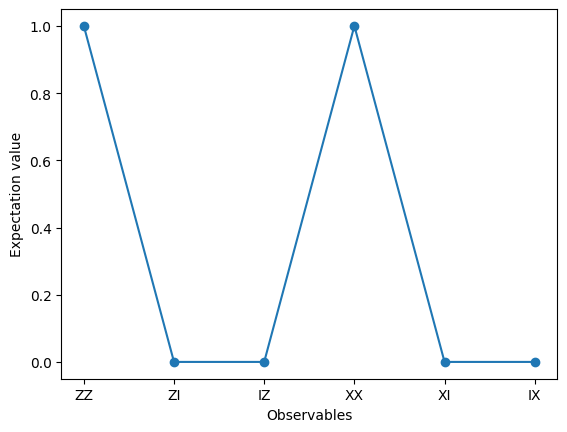

In [130]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job1.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

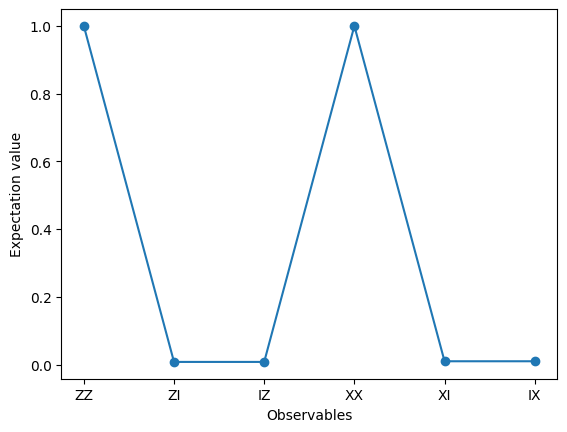

In [118]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job2.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

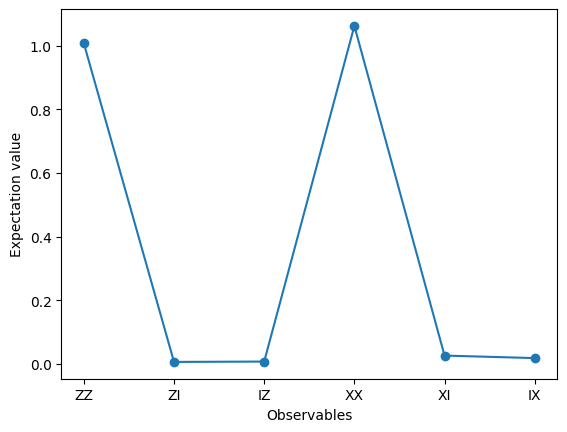

In [13]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job3_result[0].data.evs

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

In [12]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job4_result[0].data.evs

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

NameError: name 'job4_result' is not defined

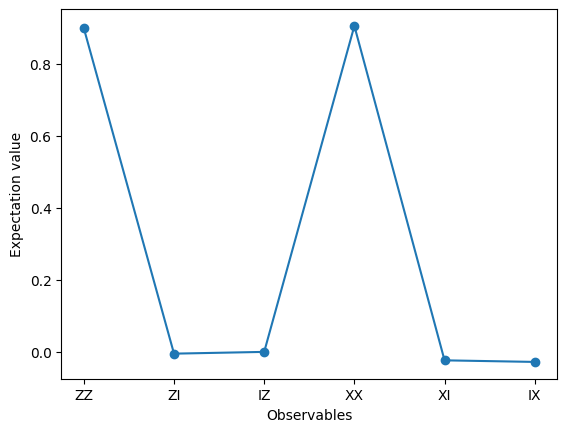

In [39]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job5_result[0].data.evs

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()